### Reduce Dimension using autoencoder

In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from livelossplot import PlotLossesKeras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
im_vecs = pd.read_pickle('./image_vecs_resnet50v2.pkl')
im_vecs

,item_id,image_features
0,B018U5OE5S,"[0.0, 0.0, 1.0194079, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,B00H5BOA4O,"[0.0, 0.0, 0.09564662, 0.0, 0.0, 0.0, 0.599519..."
2,B00YD74M4Q,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.46861327, 0.0..."
3,B00P9VF3DE,"[0.0, 0.071196795, 4.2170134, 0.0, 0.0, 0.0, 0..."
4,B005VUPI7O,"[0.0, 0.7706065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,B00GXSDG2C,"[0.0, 0.0, 0.09564662, 0.0, 0.0, 0.0, 0.599519..."
6,B00H5BO0DK,"[0.0, 0.0, 0.09564662, 0.0, 0.0, 0.0, 0.599519..."
7,B00CT7B2KO,"[0.0, 0.0, 0.09564662, 0.0, 0.0, 0.0, 0.599519..."
8,B00CT7DJZ0,"[0.0, 0.0, 0.09564662, 0.0, 0.0, 0.0, 0.599519..."
9,B00BXLSSOU,"[0.0, 2.3521254, 0.0, 0.0, 0.08767879, 0.0, 0...."


### Dense Autoencoder

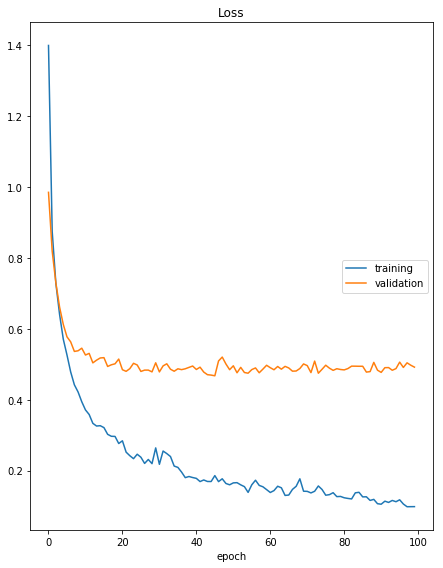

Loss
	training         	 (min:    0.098, max:    1.398, cur:    0.099)
	validation       	 (min:    0.467, max:    0.984, cur:    0.492)
528/528 [==============================] - 7s 14ms/sample - loss: 0.0987 - val_loss: 0.4918


In [5]:
im_vec_len = 2048
encoding_dim = 256

im_input=Input(shape=(im_vec_len,), name="Image-Input")
x = GaussianNoise(stddev=0.1)(im_input)
x = Dense(1056, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(528, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)
y = Dense(528, activation='relu')(encoded)
y = Dropout(0.2)(x)
y = Dense(1056, activation='relu')(y)
decoded = Dense(im_vec_len, activation='linear')(y)
autoencoder = Model(im_input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

best = ModelCheckpoint('./models/ae_resnet50.h5',
                        monitor='val_loss',
                        verbose=0,
                        save_best_only=True,
                        mode='auto')

autoencoder.fit(np.vstack(im_vecs.image_features), np.vstack(im_vecs.image_features),
                epochs=100,
                batch_size=30,
                shuffle=True,
                validation_split=0.2,
                callbacks=[PlotLossesKeras(),best])

### Generate and save encoded feature

In [6]:
encoder = Model(im_input, encoded)
encoded_ims = encoder.predict(np.vstack(im_vecs.image_features))

In [7]:
im_vecs['image_features_encoded'] = pd.Series(encoded_ims.tolist()).to_frame()

In [8]:
im_vecs.to_pickle('./image_vecs_encoded.pkl')
encoder.save('./models/encoder.h5')